<a href="https://colab.research.google.com/github/MingisASaltedFish/MSBD-5002/blob/main/openpose_%E7%9A%84%E5%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0
Receiving objects: 100% (154/154), 20.18 MiB | 23.06 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/pytorch-openpose


In [2]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

In [10]:
!cp /content/body_pose_model.pth model

In [11]:
!cp /content/hand_pose_model.pth model

In [12]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

In [31]:
import os
list_A = []
filePath = '/content/deep data'
for i in os.listdir(filePath):
  list_A.append(i)

list_A

['fall-10-cam0-d-030.png',
 'fall-10-cam0-d-107.png',
 'fall-10-cam0-d-017.png',
 'fall-10-cam0-d-001.png',
 'fall-10-cam0-d-059.png']

In [33]:
import os
list_B = []
filePath = '/content/rgb data'
for i in os.listdir(filePath):
  list_B.append(i)

list_B

['fall-10-cam0-rgb-059.png',
 'fall-10-cam0-rgb-001.png',
 'fall-10-cam0-rgb-017.png',
 'fall-10-cam0-rgb-107.png',
 'fall-10-cam0-rgb-030.png']

In [34]:
list_A[0]

'fall-10-cam0-d-030.png'

In [62]:
test_image = '/content/rgb data/fall-10-cam0-rgb-107.png'

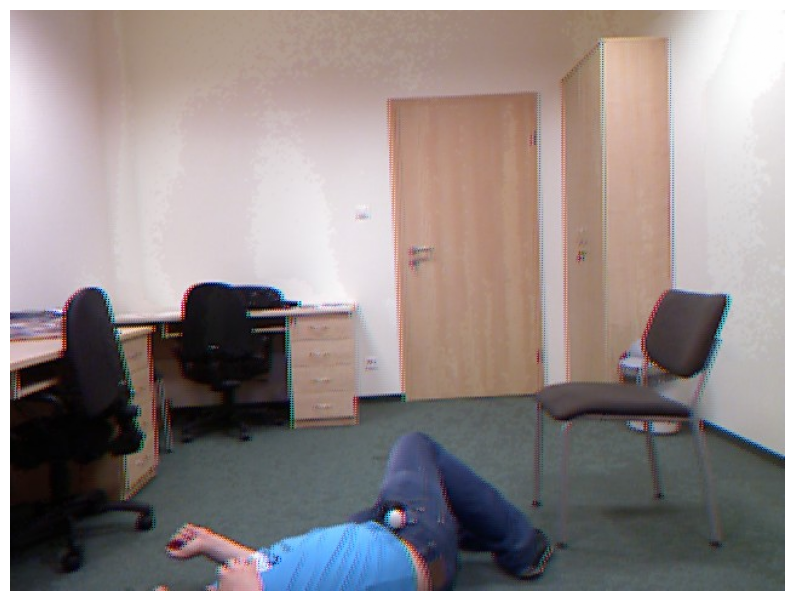

In [63]:
import matplotlib.pyplot as plt
image = plt.imread(test_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [64]:
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

13
0


In [65]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

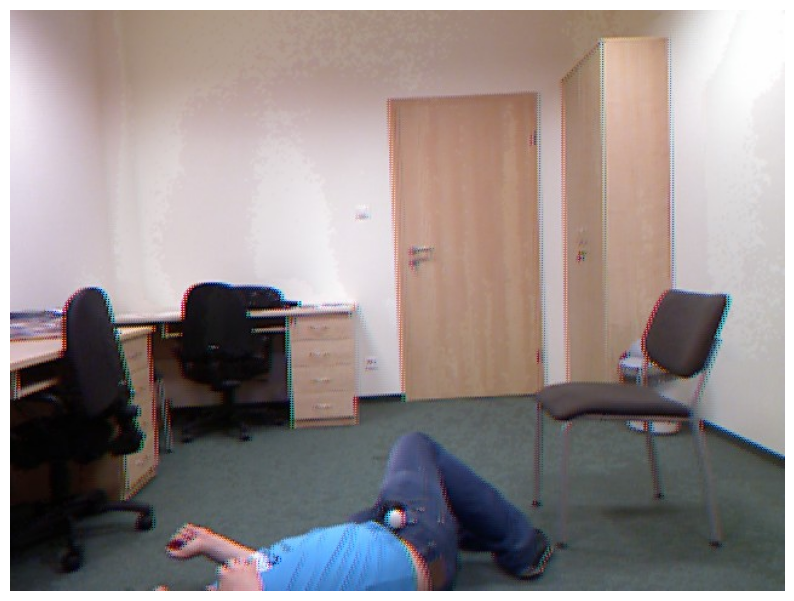

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()